<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab4_dyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: TD and Dyna




## Exercise 1: Implement SARSA with n-step TD (n=5) on CliffWalking

**Objective:**  
In this exercise, you will implement the **SARSA algorithm** using **n-step temporal-difference learning with n=5**. You will apply your implementation to the **CliffWalking environment** in Gymnasium, and analyze how multi-step returns influence learning compared to standard 1-step SARSA.

---

### Environment
- Use `CliffWalking-v1`

---

### Instructions
1. Implement **SARSA with n-step TD updates (n=5)**:
   - Maintain an action-value table \(Q(s,a)\).
   - Use ε-greedy exploration.
   - Store states, actions, and rewards for the last 5 steps.
   - After each step, compute the n-step return: G_t
   - Update \(Q(s_t,a_t)\) toward \(G_t\).

2. Train your agent for several thousand episodes (e.g., 5,000).

3. Plot the **episode rewards over time** to visualize learning progress.

4. Compare qualitatively with 1-step SARSA:
   - Does n-step SARSA converge faster or slower?
   
   n-step SARSA converges significantly faster than the standard 1-step version. While 1-step SARSA takes around 1500 episodes to converge, the n-step method converges within roughly 10 episodes, highlighting the strong impact of the step numbers. Moreover, 5-step SARSA not only converges more quickly but also achieves higher average returns than the 1-step variant.

   - How do the policies differ near the cliff?
   
   The policy learned with 5-step SARSA is more stable and cautious compared to 1-step SARSA. In particular, it avoids making moves toward the cliff, resulting in a safer and more reliable policy.


---

### Deliverables
- Python code implementing SARSA with TD(5) (notebook in Github).  
- A plot of episode number vs episode return (plot in a cell below).  
- A short discussion (1 paragraph) comparing the results with standard SARSA.  


100%|██████████| 5000/5000 [00:02<00:00, 2435.79it/s]


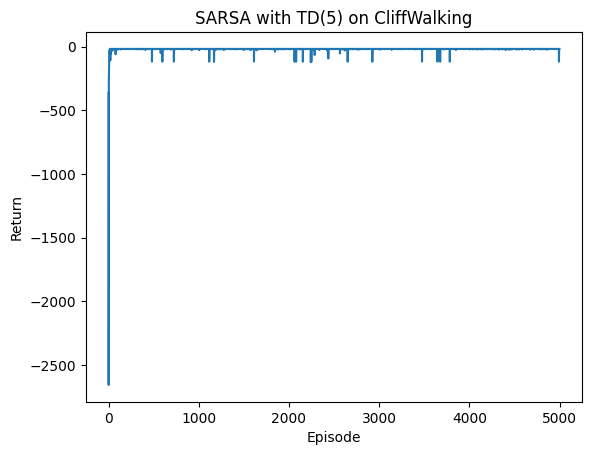

[-361, -2657, -262, -253, -221, -201, -161, -40, -42, -30, -23, -23, -23, -23, -23, -17, -17, -23, -17, -108, -23, -59, -17, -17, -17, -17, -19, -17, -17, -20, -17, -17, -17, -17, -17, -17, -17, -19, -29, -17, -17, -17, -17, -29, -18, -17, -17, -17, -17, -17, -17, -18, -17, -17, -17, -17, -19, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -18, -17, -17, -17, -18, -17, -17, -17, -59, -17, -19, -17, -17, -17, -17, -18, -19, -17, -19, -17, -17, -17, -17, -25, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -19, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -19, -17, -17, -17, -17, -17, -17, -17, -21, -17, -17, -17, -17, -17, -17, -17, -18, -18, -19, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -19, -18, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -19, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -17, -19, -17, -17, 

In [35]:
"""
Starter code for Exercise (you can use this code, or extend your code from previous lab)
Implement SARSA with TD(5) on CliffWalking-v1
"""

from tqdm import tqdm
import numpy as np
import gymnasium as gym
from collections import deque
import matplotlib.pyplot as plt

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.01         # epsilon for epsilon-greedy policy
n_step = 5            # number of steps for TD(n)
n_episodes = 5000

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

# Track returns
episode_returns = []

for ep in tqdm(range(n_episodes)):

    # Buffers to store the trajectory
    states = []
    actions = []
    rewards = []

    state, _ = env.reset()
    states.append(state)
    action = epsilon_greedy(state)
    actions.append(action)
    rewards.append(0)

    T = float("inf")
    t = 0

    while True:
        if t < T:
            # Take real step in the environment
            action_t = actions[t]
            next_state, reward, terminated, truncated, _ = env.step(action_t)
            states.append(next_state)
            rewards.append(reward)

            done = terminated or truncated
            if done:
                T = t + 1
            else:
                action_next = epsilon_greedy(next_state)
                actions.append(action_next)

        # Time index for state/action to update
        tau = t - n_step + 1
        if tau >= 0:
            # TODO: Compute the n-step return G for state tau
            # Hint: use rewards[tau : tau+n] plus Q(s_t+n, a_t+n) if not terminal

            # Example structure:
            G = 0.0
            # accumulate discounted rewards
            for i in range(tau+1, min(tau + n_step, T)):
                G += (gamma ** (i - tau - 1)) * rewards[i]
            if tau + n_step < T:
                # print(f"{len(states)=}")
                # print(f"{tau + n_step=}")
                s_tau_n = states[tau + n_step]
                a_tau_n = actions[tau + n_step]
                G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]

            # TODO: Update Q[states[tau], actions[tau]] toward G
            Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])

        if tau == T - 1:
            break

        t += 1

    episode_returns.append(sum(rewards))

# Plot learning curve
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("SARSA with TD(5) on CliffWalking")
plt.show()
print(episode_returns)


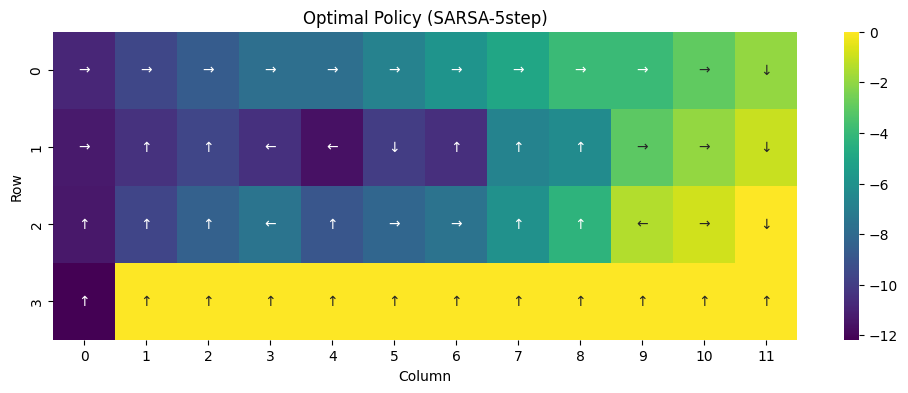

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_policy(Q, title="SARSA-5step"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA-5step)")
  plt.show()
plot_policy(Q)

## Exercise 2: Dyna-Q for CliffWalking

**Objective**  
Implement **Dyna-Q** on **CliffWalking-v1** and compare its learning performance to **SARSA (1-step)** and **SARSA TD(5)**. You will analyze sample efficiency, stability near the cliff, and sensitivity to planning steps.

---

### Environment
- Use `CliffWalking-v1`
---

### Part A — Dyna-Q (Implementation)
1. **Q-table**: maintain `Q[s, a]` (tabular).
2. **Model**: learn an empirical model from experience.
   - For each observed transition `(s, a, r, s')`, update a dictionary:
     - Minimal: store the most recent `(s', r)` for `(s, a)`, **or**
     - Advanced: store a **multiset** of outcomes for `(s, a)` with counts (to sample stochastically).
3. **Real update (Q-learning)** after each env step:
   Q(s,a) ← Q(s,a) + α * (r + γ * max_a' Q(s',a') - Q(s,a))
4. **Planning updates**: after each real step, perform `N` simulated updates:
   - Sample a previously seen `(s_p, a_p)` from the model.
   - Sample `(r_p, s'_p)` from that entry.
   - Apply the same Q-learning backup using `(s_p, a_p, r_p, s'_p)`.
5. Use epsilon-greedy exploration.

---

### Part B — Baselines (Re-use / Implement)
- **SARSA (1-step)** with ε-greedy:
  \[
  Q(s,a) \leftarrow Q(s,a) + \alpha\big[r + \gamma Q(s',a') - Q(s,a)\big]
  \]
- **SARSA TD(5)** (n-step SARSA with \(n=5\)), as in Exercise 1.

Use the **same** γ, α, ε schedule, and number of episodes for a fair comparison.

---

### Part C — Experiments & Comparisons
1. **Learning curves**: plot **episode index vs. episode return** for:
   - Dyna-Q with \(N \in \{5, 20, 50\}\)
   - SARSA (1-step)
   - SARSA TD(5)
2. **Sample efficiency**: report the **episode number** at which the average return over a sliding window (e.g., 100 episodes) first exceeds a chosen threshold (e.g., −30).
3. **Stability near the cliff**: qualitatively inspect trajectories/policies; does the method hug the cliff or leave a safer margin?
4. **Sensitivity to planning steps**: compare Dyna-Q across N; discuss diminishing returns vs. computation.
5. **Statistical robustness**: run **≥5 seeds**; plot mean ± std (shaded) or report mean ± std of final returns.

---

### Deliverables
- **Code**: A driver script/notebook that reproduces your plots
- **Plots** (embedded in the notebook):
  - Learning curves (mean ± std across seeds)
  - Optional: heatmap of greedy policy/actions on the grid




100%|██████████| 200/200 [00:01<00:00, 188.65it/s]


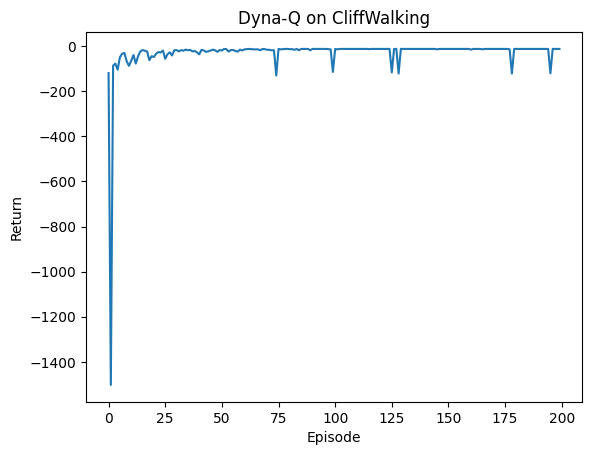

[-120, -1502, -87, -78, -105, -50, -34, -31, -68, -88, -65, -40, -78, -46, -24, -18, -21, -24, -63, -45, -49, -34, -27, -29, -20, -57, -37, -28, -42, -19, -18, -24, -18, -21, -16, -19, -17, -24, -22, -28, -37, -17, -20, -26, -24, -20, -16, -19, -26, -18, -20, -13, -14, -25, -18, -18, -22, -25, -16, -20, -15, -14, -13, -14, -15, -15, -15, -19, -13, -14, -17, -17, -19, -19, -131, -13, -15, -14, -13, -13, -14, -14, -17, -13, -19, -13, -13, -13, -13, -19, -13, -13, -13, -13, -13, -13, -13, -14, -15, -115, -13, -15, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -14, -13, -13, -13, -13, -13, -13, -13, -13, -13, -117, -13, -13, -122, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -15, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -16, -13, -13, -13, -13, -15, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -15, -122, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -121, -13, -13,

In [58]:


from tqdm import tqdm
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.01         # epsilon for epsilon-greedy policy
n_step = 5            # number of steps for TD(n)
n_episodes = 200
planning_steps = 5

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

# Track returns
episode_returns = []

# Initialize Q-table
Q = np.zeros((n_states, n_actions))
model = {s: {a: None for a in range(n_actions)} for s in range(n_states)}

for _ in tqdm(range(n_episodes)):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward
        # print(reward, action)

        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        model[state][action] = (reward, next_state)


        # Planning steps
        for _ in range(planning_steps):
            # randomly sample a previously seen (s,a)
            seen_sa = [(s, a) for s in range(n_states) for a in range(n_actions) if model[s][a] is not None]
            if len(seen_sa) == 0:
                continue
            s_p, a_p = random.choice(seen_sa)
            r_p, s_next_p = model[s_p][a_p]
            Q[s_p, a_p] += alpha * (r_p + gamma * np.max(Q[s_next_p]) - Q[s_p, a_p])

        state = next_state

    episode_returns.append(total_reward)

# Plot learning curve
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Dyna-Q on CliffWalking")
plt.show()
print(episode_returns)


## Exercise 3: Solve FrozenLake with Q-Learning and Dyna-Q (Stochastic Model)

**Objective**  
Implement and compare **Q-learning** and **Dyna-Q** on Gymnasium’s `FrozenLake-v1`.  
For Dyna-Q, your learned **transition model must handle multiple possible next states** per `(s, a)` (stochastic slip), i.e., store and sample **a distribution** over `(s', r)` outcomes rather than a single next state.

---

### Environment
- Use `FrozenLake-v1` from `gymnasium.envs.toy_text`.
- You can start with map 4×4; and then work with 8×8.
- Start → Goal with slippery transitions (stochastic).  
- Rewards: `+1` at goal, `0` otherwise (holes terminate with 0).

---

### Part A — Q-learning (baseline)
1. Maintain a tabular action-value function `Q[s, a]`.
2. Behavior: ε-greedy over `Q`.
3. Update after each real step:
   - target = r + γ * max_a' Q[s', a']   (if terminal: target = r)
   - Q[s, a] ← Q[s, a] + α * (target − Q[s, a])
4. Train for several thousand episodes (e.g., 5,000) with an ε schedule (e.g., 0.2 → 0.01).

---

### Part B — Dyna-Q with a **stochastic transition model**
1. **Empirical model (multinomial):** for each `(s, a)`, maintain a multiset of observed outcomes:
   - `model[(s, a)] = [(s'_1, r_1, count_1), (s'_2, r_2, count_2), ...]`
   - Update counts whenever you observe `(s, a, r, s')`.
2. **Real step update (Q-learning):** same as Part A.
3. **Planning steps (N per real step):**
   - Sample a previously seen `(s_p, a_p)` uniformly (or with priority).
   - Sample `(s'_p, r_p)` **from the empirical distribution** for `(s_p, a_p)` using counts as probabilities.
   - Apply the same Q-learning backup with `(s_p, a_p, r_p, s'_p)`.
4. Train with the same ε schedule and number of episodes; vary `N ∈ {5, 20, 50}`.

---

### Experiments & Analysis
1. **Learning curves:** plot episode index vs episode return (smoothed) for:
   - Q-learning
   - Dyna-Q (N=5, 20, 50)
2. **Sample efficiency:** report the episode at which the moving-average return (e.g., window 100) first exceeds a threshold (you choose a reasonable value).
3. **Effect of stochastic modeling:** briefly explain why storing a distribution over `(s', r)` matters on FrozenLake (slip), and what happens if you store only the most recent outcome.
4. **Robustness:** run ≥5 random seeds; report mean ± std of final evaluation returns.

---

### Deliverables
- **Code** for Q-learning and Dyna-Q (with stochastic model).  
- **Plots** of learning curves (include legend and axis labels).  
- ** Discussion:** why Dyna-Q helps here; impact of N; importance of modeling multiple next states.

---

### Hints
- For terminal transitions (goal/hole), the Q-learning target is simply `target = r` (no bootstrap).  
- When sampling from the model, use probabilities `p_i = count_i / sum_j count_j`.  
- Tie-break greedy action selection uniformly among argmax actions to avoid bias.  
- Keep evaluation **greedy (ε=0)** and consistent across methods (same seeds and episode counts).
